## Plot paper figure 3

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Experimental parameters.
nvalues = [10, 20, 30, 40, 60]
max_num_trajectories: int = 100_000
nsamples_values = np.linspace(100, max_num_trajectories, 200, dtype=int)

In [3]:
# Load data.
fids = np.loadtxt("fids.txt").reshape(50, 5, 200)

means = np.mean(fids, axis=0)
stds = np.std(fids, ddof=1, axis=0)

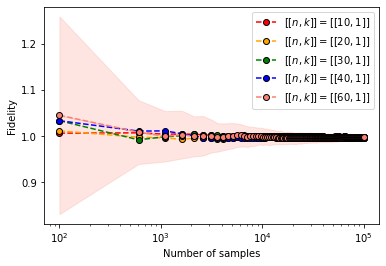

In [4]:
# Figure 3(a).
colors = ("red", "orange", "green", "blue", "salmon", "grey")
alpha = 0.2

for N, ys, errs, color in zip(nvalues[:], means[:], stds[:], colors):
    plt.plot(nsamples_values, ys, "--o", color=color, mec="black", label=f"$[[n, k]] = [[{N}, 1]]$")
    if N == nvalues[-1]:
        plt.fill_between(nsamples_values, ys, ys + errs, alpha=alpha, color=color)
        plt.fill_between(nsamples_values, ys, ys - errs, alpha=alpha, color=color)

plt.xlabel("Number of samples")
plt.ylabel("Fidelity")
plt.xscale("log")
plt.legend();

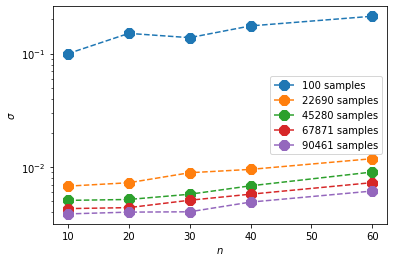

In [5]:
# Figure 3(b).
start = 0
stop = -1
step = 45

for err, nsamp in zip(stds.T[start:stop:step], nsamples_values[start:stop:step]):
    plt.plot(nvalues, err, "--8", ms=10, label=f"{nsamp} samples")

plt.xlabel("$n$")
plt.ylabel("$\sigma$")
plt.yscale("log")
plt.legend();